In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

## Create necessary classes and functions

Create class to handle "cities"

In [2]:
class City:
    def __init__(self, city_name,x, y, marCortez, golfoMexico):
        self.city_name = city_name
        self.x = y
        self.y = x
        self.marCortez = marCortez
        self.golfoMexico = golfoMexico
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        
        penalty = 5
        
        distance = np.sqrt((xDis ** 2) + (yDis ** 2)) 
        + (penalty * (self.marCortez - city.marCortez)** 2) 
        + (penalty * (self.golfoMexico - city.golfoMexico)**2)
        
        return distance
    
    def getCity(self):
        print(self.city)
        return(self.city_name)
    
    def getX(self):
        return(self.x)
    def getY(self):
        return(self.y)
    
    def __repr__(self):
        return "(" + str(self.city_name) + ","+ str(self.x) + "," + str(self.y) + ")"

Create a fitness function

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

## Create our initial population

Route generator

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

Create first "population" (list of routes)

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

## Create the genetic algorithm

Rank individuals

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

Create a selection function that will be used to make the list of parent routes

In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

Create mating pool

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

Create a crossover function for two parents to create one child

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

Create function to run crossover over full mating pool

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

Create function to mutate a single route

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

Create function to run mutation over entire population

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

Put all steps together to create the next generation

In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

Final step: create the genetic algorithm

In [14]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

## Running the genetic algorithm

Create list of cities

In [15]:
cityList = []

cityList.append(City(city_name = "Ciudad de México", x=19.4326, y= -99.1332, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Puebla de Zaragoza", x=19.0414, y= -98.2063, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Guadalajara", x=20.6597, y= -103.3496, marCortez = 1 , golfoMexico = 1))

cityList.append(City(city_name = "Monterrey", x=25.6866, y= -100.3161, marCortez = 1 , golfoMexico = 1))


cityList.append(City(city_name = "Chihuahua ", x=28.6330, y= -106.0691, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Mérida", x=20.9674, y= -89.5926, marCortez = 1 , golfoMexico = -1))
cityList.append(City(city_name = "Saltillo", x=25.4383, y= -100.9737, marCortez = 1 , golfoMexico = 1))

cityList.append(City(city_name = "Aguascalientes", x=21.8853, y= -102.2916, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Hermosillo", x=29.0730, y= -110.9559, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Mexicali", x=32.6245, y= -115.4523, marCortez = -1 , golfoMexico = 1))

cityList.append(City(city_name = "San Luis Potosí ", x=22.1566, y= -100.9855, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Culiacán Rosales", x=24.8091, y= -107.3940, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Santiago de Querétaro", x=20.5888, y= -100.3899, marCortez = 1 , golfoMexico = 1))

cityList.append(City(city_name = "Morelia", x=19.7060, y= -101.1950, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Durango", x=24.0277, y= -104.6532, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Tuxtla Gutiérrez ", x=16.7516, y= -93.1030, marCortez = 1 , golfoMexico = 1))

cityList.append(City(city_name = "Xalapa-Enríquez ", x=19.5438, y= -96.9102, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Tepic", x=21.5042, y= -104.8946, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Cuernavaca", x=18.9242, y= -99.2216, marCortez = 1 , golfoMexico = 1))

cityList.append(City(city_name = "Villahermosa", x=17.9895, y= -92.9475, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Ciudad Victoria", x=23.7369, y= -99.1411, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Pachuca de Soto", x=20.1011, y= -98.7591, marCortez = 1 , golfoMexico = 1))

cityList.append(City(city_name = "Oaxaca de Juárez", x=17.0732, y= -96.7266, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "La Paz", x=24.1426, y= -110.3128, marCortez = -1 , golfoMexico = 1))
cityList.append(City(city_name = "San Francisco de Campeche", x=19.8301, y= -90.5349, marCortez = 1 , golfoMexico = -1))

cityList.append(City(city_name = "Chilpancingo de los Bravo ", x=17.5515, y= -99.5006, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Toluca de Lerdo ", x=19.2826, y= -99.6557, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Chetumal", x=18.5002, y= -88.2961, marCortez = 1 , golfoMexico = -1))

cityList.append(City(city_name = "Colima", x=19.2452, y= -88.2961, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Zacatecas", x=22.7709, y= -103.7241, marCortez = 1 , golfoMexico = 1))
cityList.append(City(city_name = "Guanajuato", x=21.0190, y= -101.2574, marCortez = 1 , golfoMexico = 1))

cityList.append(City(city_name = "Tlaxcala de Xicohténcatl", x=19.3182, y= -98.2375, marCortez = 1 , golfoMexico = 1))

print(len(cityList))

32


Run the genetic algorithm

In [16]:
history = geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=600)

Initial distance: 213.9644465452041
Final distance: 87.07387882374043


In [17]:
history

[(Saltillo,-100.9737,25.4383),
 (Monterrey,-100.3161,25.6866),
 (Ciudad Victoria,-99.1411,23.7369),
 (Oaxaca de Juárez,-96.7266,17.0732),
 (Tuxtla Gutiérrez ,-93.103,16.7516),
 (Villahermosa,-92.9475,17.9895),
 (Chetumal,-88.2961,18.5002),
 (Colima,-88.2961,19.2452),
 (Mérida,-89.5926,20.9674),
 (San Francisco de Campeche,-90.5349,19.8301),
 (Xalapa-Enríquez ,-96.9102,19.5438),
 (Puebla de Zaragoza,-98.2063,19.0414),
 (Tlaxcala de Xicohténcatl,-98.2375,19.3182),
 (Chilpancingo de los Bravo ,-99.5006,17.5515),
 (Cuernavaca,-99.2216,18.9242),
 (Toluca de Lerdo ,-99.6557,19.2826),
 (Ciudad de México,-99.1332,19.4326),
 (Pachuca de Soto,-98.7591,20.1011),
 (Santiago de Querétaro,-100.3899,20.5888),
 (Morelia,-101.195,19.706),
 (Guanajuato,-101.2574,21.019),
 (San Luis Potosí ,-100.9855,22.1566),
 (Aguascalientes,-102.2916,21.8853),
 (Zacatecas,-103.7241,22.7709),
 (Durango,-104.6532,24.0277),
 (Chihuahua ,-106.0691,28.633),
 (Hermosillo,-110.9559,29.073),
 (Mexicali,-115.4523,32.6245),
 (L

In [18]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

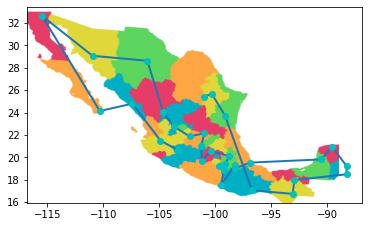

In [19]:
fig, ax = plt.subplots()
line, = plt.plot([], [], lw=2)
    
x = []
y = []
    
for i in history:
    x.append(i.getX())
    y.append(i.getY())

plt.plot(x, y, 'co')

#for i in history:
 #   cityName = str(i.getCity())
  #  plt.annotate(cityName, (i.getX(), i.getY()))
    
img = plt.imread("mapaMexico.jpg")
ax.imshow(img, extent=[-117, -89, 15, 33])

extra_x = (max(x) - min(x)) * 0.05
extra_y = (max(y) - min(y)) * 0.05
ax.set_xlim(min(x) - extra_x, max(x) + extra_x)
ax.set_ylim(min(y) - extra_y, max(y) + extra_y)

'''initialize solution to be empty '''
line.set_data([], [])

line.set_data(x, y)

plt.show()



## Plot the progress

Note, this will win run a separate GA

In [20]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

Run the function with our assumptions to see how distance has improved in each generation

In [ ]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)